## BC1 - Hotel Customer Segmentation

### Dataset description

#### customer data:
- **ID** - Customer ID;
- **Nationality** - Nationality of the customer in ISO 3166-1 (Alpha 3) format;
- **Age** - Age of the customer;
- **DaysSinceCreation** - Number of elapsed days since the customer was created;
- **NameHash** - Hash of the customer name;
- **DocIDHash** - Hash of the customer personal document identification number (usually passport or ID card);

#### info related with the stay:
- **AverageLeadTime** - Average number of days before arrival date the customer makes booking;
- **LodgingRevenue** - Total amount of lodging revenue paid by the customer so far;
- **OtherRevenue** - Total amount of other revenue (e.g., food & beverage, spa, etc.) paid by the customer so far;
- **BookingsCanceled** - Number of bookings the customer made but subsequently canceled;
- **BookingsNoShowed** - Number of bookings the customer made but subsequently made a "no-show";
- **BookingsCheckedin** - Number of bookings the customer made, which actually ended up staying;
- **PersonNights** - Total person/nights the customer has stayed at the hotel so far; 
- **Persons/Nights** - the sum of Adultsand Childrenin each booking, multiplied by the number of Nights(Length-of-stay) of the booking;
- **RoomNights** - Total of room/nights the customer has stayed at the hotel so far. Room/Nights are the multiplication of the number of rooms of each booking by the the number of Nights(Length-of-stay) of the booking;
- **DistributionChannel** - Distribution channel normally used by the customer to make bookings at the hotel;
- **MarketSegment** - Current market segment of the customer; 
- **SRHighFloor** - Indication if the customer usually asks for a room in a higher floor (0: No, 1: Yes);
- **SRLowFloor** - Indication if the customer usually asks for a room in a lower floor (0: No, 1: Yes);
- **SRAccessibleRoom** - Indication if the customer usually asks for an accessible room (0: No, 1: Yes); 
- **SRMediumFloor** - Indication if the customer usually asks for a room in a middle floor (0: No, 1: Yes); 
- **SRBathtubIndication** - if the customer usually asks for a room with a bathtub (0: No, 1: Yes); 
- **SRShower** - Indication if the customer usually asks for a room with a shower (0: No, 1: Yes);
- **SRCrib** - Indication if the customer usually asks for a crib (0: No, 1: Yes);
- **SRKingSizeBed** - Indication if the customer usually asks for a room with a king size bed (0: No, 1: Yes); 
- **SRTwinBed** - Indication if the customer usually asks for a room with a twin bed (0: No, 1: Yes); 
- **SRNearElevator** - Indication if the customer usually asks for a room near the elevator (0: No, 1: Yes); 
- **SRAwayFromElevator** - Indication if the customer usually asks for a room away from the elevator (0: No, 1: Yes);
- **SRNoAlcoholInMiniBar** - Indication if the customer usually asks for a room with no alcohol in the mini bar (0: No, 1: Yes);
- **SRQuietRoom** - Indication if the customer usually asks for a room away from the noise (0: No, 1: Yes).

<h3>Set up

In [75]:
import os
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
import collections
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import warnings
warnings.filterwarnings("ignore")

<h3>Data Understanding

In [2]:
#import and get info
df_original = pd.read_csv('Dataset.csv', sep=";")
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111733 entries, 0 to 111732
Data columns (total 29 columns):
ID                      111733 non-null int64
Nationality             111733 non-null object
Age                     107561 non-null float64
DaysSinceCreation       111733 non-null int64
NameHash                111733 non-null object
DocIDHash               110732 non-null object
AverageLeadTime         111733 non-null int64
LodgingRevenue          111733 non-null float64
OtherRevenue            111733 non-null float64
BookingsCanceled        111733 non-null int64
BookingsNoShowed        111733 non-null int64
BookingsCheckedIn       111733 non-null int64
PersonsNights           111733 non-null int64
RoomNights              111733 non-null int64
DistributionChannel     111733 non-null object
MarketSegment           111733 non-null object
SRHighFloor             111733 non-null int64
SRLowFloor              111733 non-null int64
SRAccessibleRoom        111733 non-null int64
SRMe

In [3]:
#see dataset
df_original.head(10)

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,52.0,440,0x2C371FD6CE12936774A139FD7430C624F1C4D5109CE6...,0x434FD3D59469C73AFEA087017FAF8CA2296493AEABDE...,59,292.0,82.3,1,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,NaN,1385,0x198CDB98BF37B6E23F9548C56A88B00912D65A9AA0D6...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,61,280.0,53.0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,DEU,32.0,1385,0xDA46E62F66936284DF2844EC4FC542D0DAD780C0EE0C...,0x27F5DF762CCDA622C752CCDA45794923BED9F1B66300...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,FRA,61.0,1385,0xC45D4CD22C58FDC5FD0F95315F6EFA5A6E7149187D49...,0x8E59572913BB9B1E6CAA12FA2C8B7BF387B1D1F3432E...,93,240.0,60.0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,52.0,1385,0xD2E3D5BFCA141865669F98D64CDA85AD04DEFF47F8A0...,0x42BDEE0E05A9441C94147076EDDCC47E604DA5447DD4...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
5,6,JPN,55.0,1385,0xA3CF1A4692BE0A17CFD3BFD9C07653556BDADF5F4BE7...,0x506065FBCE220DCEA4465C7310A84F04165BCB5906DC...,58,230.0,24.0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,JPN,50.0,1385,0x94DB830C90A6DA2331968CFC9448AB9A3CE07D7CFEDD...,0x47E5E4B21585F1FD956C768E730604241B380EDFEA68...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
7,8,FRA,33.0,1385,0x165B609162C92BF563E96DB03539363F07E784C219A8...,0x6BB66BA80C726B9967988A889D83699B609D11C65AD7...,38,535.0,94.0,0,...,0,0,0,0,1,0,0,0,0,0
8,9,FRA,43.0,1385,0x44BB41EF2D87698E75B6FBB77A8815BF48DAA912C140...,0x6C456E45A78A20BC794137AE326A81D587B6528B3944...,0,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,0
9,10,IRL,26.0,1385,0x9BEECEE0C18B0957C7424443643948E99A0EC8326EF9...,0x199C61A5442D08987001E170B74D244DF6AF1FC9AE92...,96,174.0,69.0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#get some insights about dataset
df_original.describe()

,ID,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
count,111733.000000,107561.000000,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000,...,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000
mean,55867.000000,45.639191,595.026599,60.833147,283.851283,64.682802,0.002282,0.000600,0.737607,4.328318,...,0.000770,0.003132,0.001629,0.016181,0.363268,0.156811,0.000331,0.003598,0.000197,0.087718
std,32254.683151,17.244952,374.657382,85.115320,379.131556,123.580715,0.080631,0.028217,0.730889,4.630739,...,0.027733,0.055881,0.040327,0.126173,0.480943,0.363624,0.018195,0.059874,0.014031,0.282886
min,1.000000,-10.000000,36.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27934.000000,33.000000,288.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55867.000000,47.000000,522.000000,21.000000,208.000000,31.000000,0.000000,0.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,83800.000000,58.000000,889.000000,95.000000,393.300000,84.000000,0.000000,0.000000,1.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,111733.000000,123.000000,1385.000000,588.000000,21781.000000,8859.250000,15.000000,3.000000,76.000000,116.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
#Check if there are ID duplicates
df_original['ID'].duplicated().any()

False

In [6]:
#Check if there are DocIDDash duplicates
df_original['DocIDHash'].duplicated().any()

True

We are going to eliminate duplicates when there's one DocIDHash with the same NameHash more than 1 time

In [7]:
df = df_original.drop_duplicates(subset=['DocIDHash', 'NameHash'], keep='first')
df

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,52.0,440,0x2C371FD6CE12936774A139FD7430C624F1C4D5109CE6...,0x434FD3D59469C73AFEA087017FAF8CA2296493AEABDE...,59,292.00,82.3,1,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,NaN,1385,0x198CDB98BF37B6E23F9548C56A88B00912D65A9AA0D6...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,61,280.00,53.0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,DEU,32.0,1385,0xDA46E62F66936284DF2844EC4FC542D0DAD780C0EE0C...,0x27F5DF762CCDA622C752CCDA45794923BED9F1B66300...,0,0.00,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,FRA,61.0,1385,0xC45D4CD22C58FDC5FD0F95315F6EFA5A6E7149187D49...,0x8E59572913BB9B1E6CAA12FA2C8B7BF387B1D1F3432E...,93,240.00,60.0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,52.0,1385,0xD2E3D5BFCA141865669F98D64CDA85AD04DEFF47F8A0...,0x42BDEE0E05A9441C94147076EDDCC47E604DA5447DD4...,0,0.00,0.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111728,111729,DEU,31.0,36,0x2F59F0E86596B861C3303585FDB7F090B1B2D70442C5...,0x86AC02B9393E7F58354BA4193D792C07DB91D4BE27C7...,0,0.00,0.0,0,...,0,0,0,0,1,0,0,0,0,0
111729,111730,BRA,43.0,36,0x2708B9F11C95F384129152CDF0830B566F02D42B87AC...,0xE87DEB08B0D7D0BDC590949FF04AAA893018BD8EB714...,170,755.25,20.0,0,...,0,0,0,0,1,0,0,0,0,0
111730,111731,BRA,37.0,36,0xEF5F6AAA6120F2AC49179E16FD12477C243A8F4FC504...,0x74B9B5A554F5F660371E56D4CE4C1D4C3DC80AE71D68...,0,0.00,0.0,0,...,0,0,0,0,1,0,0,0,0,0
111731,111732,DEU,48.0,36,0xC70AE03F615CB96B0C84CF29419C2DDFE8EC64B77104...,0xF589C016E6988AECD3E3BE793E7D606BBDB6B6D4795C...,66,708.00,185.0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
#Check missing values
df.isnull().sum()

ID                         0
Nationality                0
Age                     3741
DaysSinceCreation          0
NameHash                   0
DocIDHash                786
AverageLeadTime            0
LodgingRevenue             0
OtherRevenue               0
BookingsCanceled           0
BookingsNoShowed           0
BookingsCheckedIn          0
PersonsNights              0
RoomNights                 0
DistributionChannel        0
MarketSegment              0
SRHighFloor                0
SRLowFloor                 0
SRAccessibleRoom           0
SRMediumFloor              0
SRBathtub                  0
SRShower                   0
SRCrib                     0
SRKingSizeBed              0
SRTwinBed                  0
SRNearElevator             0
SRAwayFromElevator         0
SRNoAlcoholInMiniBar       0
SRQuietRoom                0
dtype: int64

<h4><u>Continuous Variables

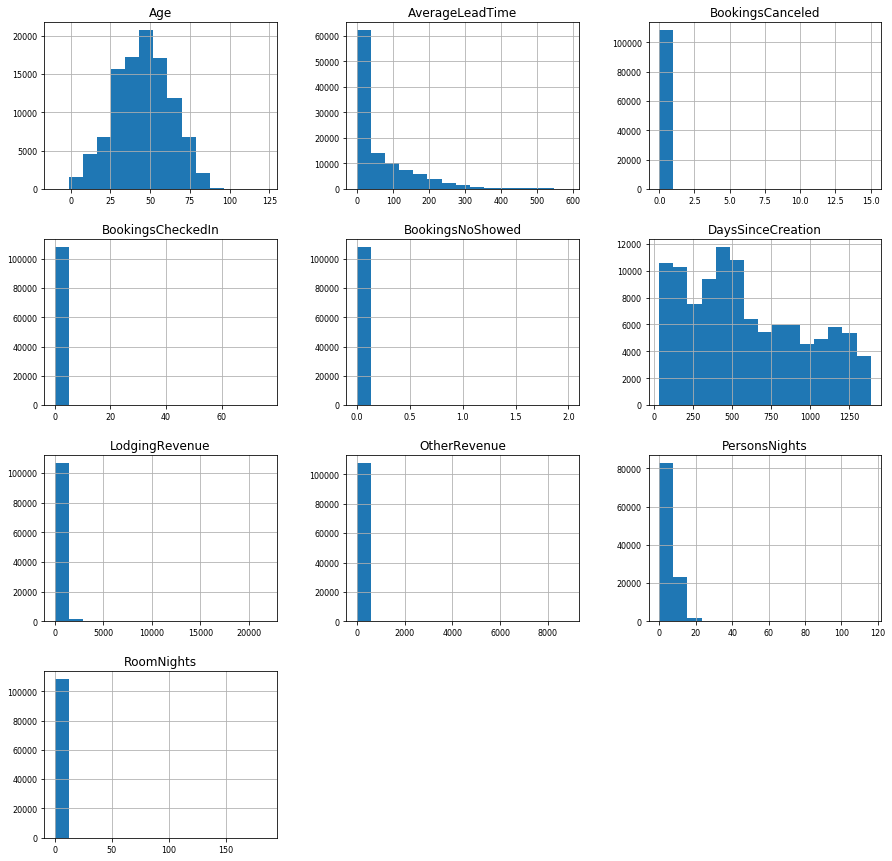

In [9]:
#plot histograms for continuos values
columns = ['Age', 'DaysSinceCreation', 'AverageLeadTime','LodgingRevenue', 'OtherRevenue', 'BookingsCanceled', 'BookingsNoShowed','BookingsCheckedIn','PersonsNights','RoomNights']
df_cont = df[columns]
df_cont.hist(bins=15, figsize=(15, 15), layout=(4, 3), xlabelsize=8, ylabelsize=8);

In [10]:
#Peso dos Nan values da Age no Total:
print(str(int((4172/111733)*100)) + str('%'))

3%


<u>Missing Values and Noises Treatment</u>


For <b>Age</b> column, as we can see above, age has a symmetric distribution, and by this reason we can fill the Nan Values with the Age average. For <b> DocIDHash</b> column once we are not going to use it, we can just drop it.

In [11]:
#Fill Nan values in the Age column
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [12]:
# We wont need the NameHash and DocumentIDHash, so let's drop it.
df = df.drop(['NameHash', 'DocIDHash'], axis=1)
print(df.isnull().sum())

ID                      0
Nationality             0
Age                     0
DaysSinceCreation       0
AverageLeadTime         0
LodgingRevenue          0
OtherRevenue            0
BookingsCanceled        0
BookingsNoShowed        0
BookingsCheckedIn       0
PersonsNights           0
RoomNights              0
DistributionChannel     0
MarketSegment           0
SRHighFloor             0
SRLowFloor              0
SRAccessibleRoom        0
SRMediumFloor           0
SRBathtub               0
SRShower                0
SRCrib                  0
SRKingSizeBed           0
SRTwinBed               0
SRNearElevator          0
SRAwayFromElevator      0
SRNoAlcoholInMiniBar    0
SRQuietRoom             0
dtype: int64


After this we are going to:
<ul>
    <li>Check how many negative values there are in 'Age' and 'AverageLeadTime' columns</li>
    <li>Check how many clients exist with age greater than 112 years old</li>
    <li>Drop the values below</li>
    <li>Check how many underage costumers (less then 18 years old) there are in our dataset</li>
     <li>Check how many underage costumers which LodgingRevenue and OtherRevenue are equal to zero</li>
</ul>

In [13]:
a = str(len(df[df.Age <= 0]))
b = str(len(df[df.Age >=112]))
c = str(len(df[df.AverageLeadTime < 0]))
un = str(len(df[df.Age < 18]))

print('There are {} costumers which Age is equal or less than zero.'.format(a))
print('')
print('There are {} costumers which Age is greater than 112 years old.'.format(b))
print('')
print('There are {} costumers which Average Lead Time is less than zero.'.format(c))
print('')
print('There are {} costumers with less than 18 years old.'.format(un))

There are 32 costumers which Age is equal or less than zero.

There are 5 costumers which Age is greater than 112 years old.

There are 13 costumers which Average Lead Time is less than zero.

There are 6777 costumers with less than 18 years old.


In [14]:
#Let's drop the these values
df_after = df[(df.Age > 0) & (df.Age <= 122)]
df_after = df_after[df_after.AverageLeadTime >= 0]
df_after

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,52.000000,440,59,292.00,82.3,1,0,2,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,45.583514,1385,61,280.00,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3,DEU,32.000000,1385,0,0.00,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,FRA,61.000000,1385,93,240.00,60.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,52.000000,1385,0,0.00,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111728,111729,DEU,31.000000,36,0,0.00,0.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
111729,111730,BRA,43.000000,36,170,755.25,20.0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
111730,111731,BRA,37.000000,36,0,0.00,0.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
111731,111732,DEU,48.000000,36,66,708.00,185.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [15]:
#Check costumers with no revenue
e = str(len(df_after[(df_after.LodgingRevenue <= 0)]))

print('There are {} which Lodging Revenues are equal to zero.'.format(e))

There are 32853 which Lodging Revenues are equal to zero.


<u>Outliers and Correlations</u>

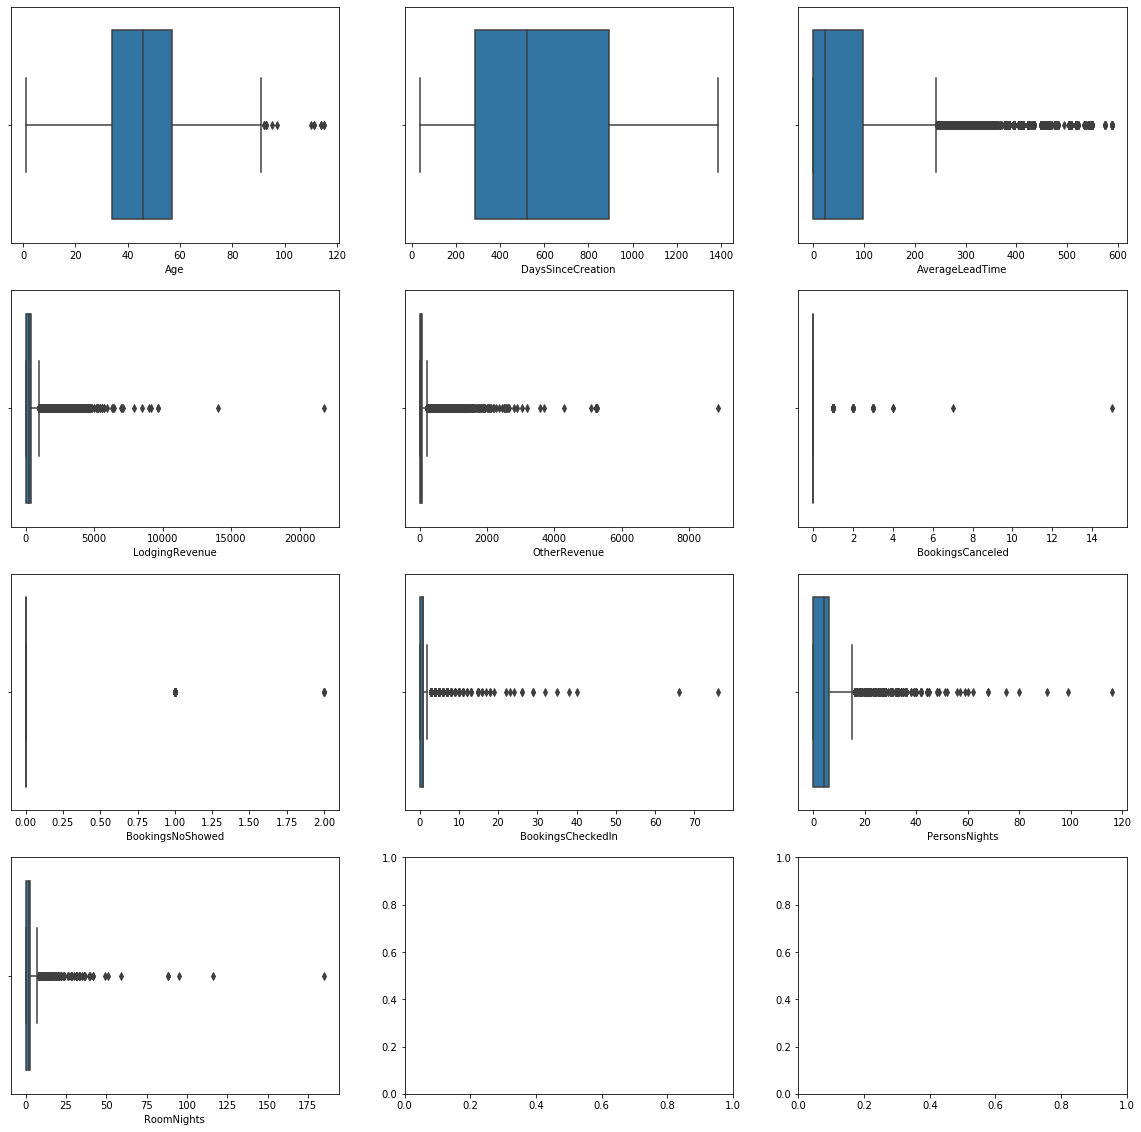

In [16]:
#Outliers detection
# Do boxplots on all numeric variables
fig, ax = plt.subplots(4, 3, figsize=(20, 20))
for var, subplot in zip(df_after[columns], ax.flatten()):
    sns.boxplot(df_after[var], ax=subplot)   

Outliers analysis:
<ul>
    <li><b>Age</b>: Consideramos apenas outliers, aliás, valores impossíveis, os valores negativos e a pessoa com 123 anos, pois após uma pesquisa vimos que a pessoa mais velha que já existiu tinha 122 anos.</li>
    <li><b>DaysSinceCreation</b>: No outlier detected.</li>
    <li><b>AverageLeadTime</b>:Consider as outliers after ~580 (?) (Filipa: pela distribuição da boxplot, parece que não há outliers, há é muitos clientes depois do 3.º quartil)</li>
    <li><b>Lodging Revenue</b>:Consider as outliers after 10 000 (?)</li>
    <li><b>Other Revenue</b>:Consider as outliers after 4000 (?) (Filipa: acho que talvez considerar só o ultimo outlier porque está mesmo muito longe)</li>
    <li><b>Bookings Canceled</b>:Consider as outliers after after 7.5 (?)</li>
    <li><b>Bookings No Showed</b>:No outlier detected (?)</li>
    <li><b>Bookings CheckedIn</b>:Consider as outliers after after 40 (?) (Filipa: também não sei, porque de certo modo são os melhores clientes)</li>
    <li><b>Persons Night</b>:Consider as outliers after ~65 (?) (Filipa: também não consigo ter certezas)</li>
    <li><b>Room Nights</b>:Consider as outliers after after ~55 (?)</li>
</ul>

In [17]:
df_after[df_after.BookingsCheckedIn == 0]

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
2,3,DEU,32.0,1385,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,52.0,1385,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,JPN,50.0,1385,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,9,FRA,43.0,1385,0,0.0,0.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
10,11,IRL,28.0,1385,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111723,111724,ITA,56.0,37,0,0.0,0.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
111725,111726,PAN,60.0,37,0,0.0,0.0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
111728,111729,DEU,31.0,36,0,0.0,0.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
111730,111731,BRA,37.0,36,0,0.0,0.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [18]:
df_after = df_after[(df_after.LodgingRevenue < 10000) & (df_after.OtherRevenue < 8000) & (df_after.BookingsCanceled < 8)
                    & (df_after.BookingsCheckedIn < 45) & (df_after.RoomNights < 70) & (df_after.BookingsCheckedIn > 0)]

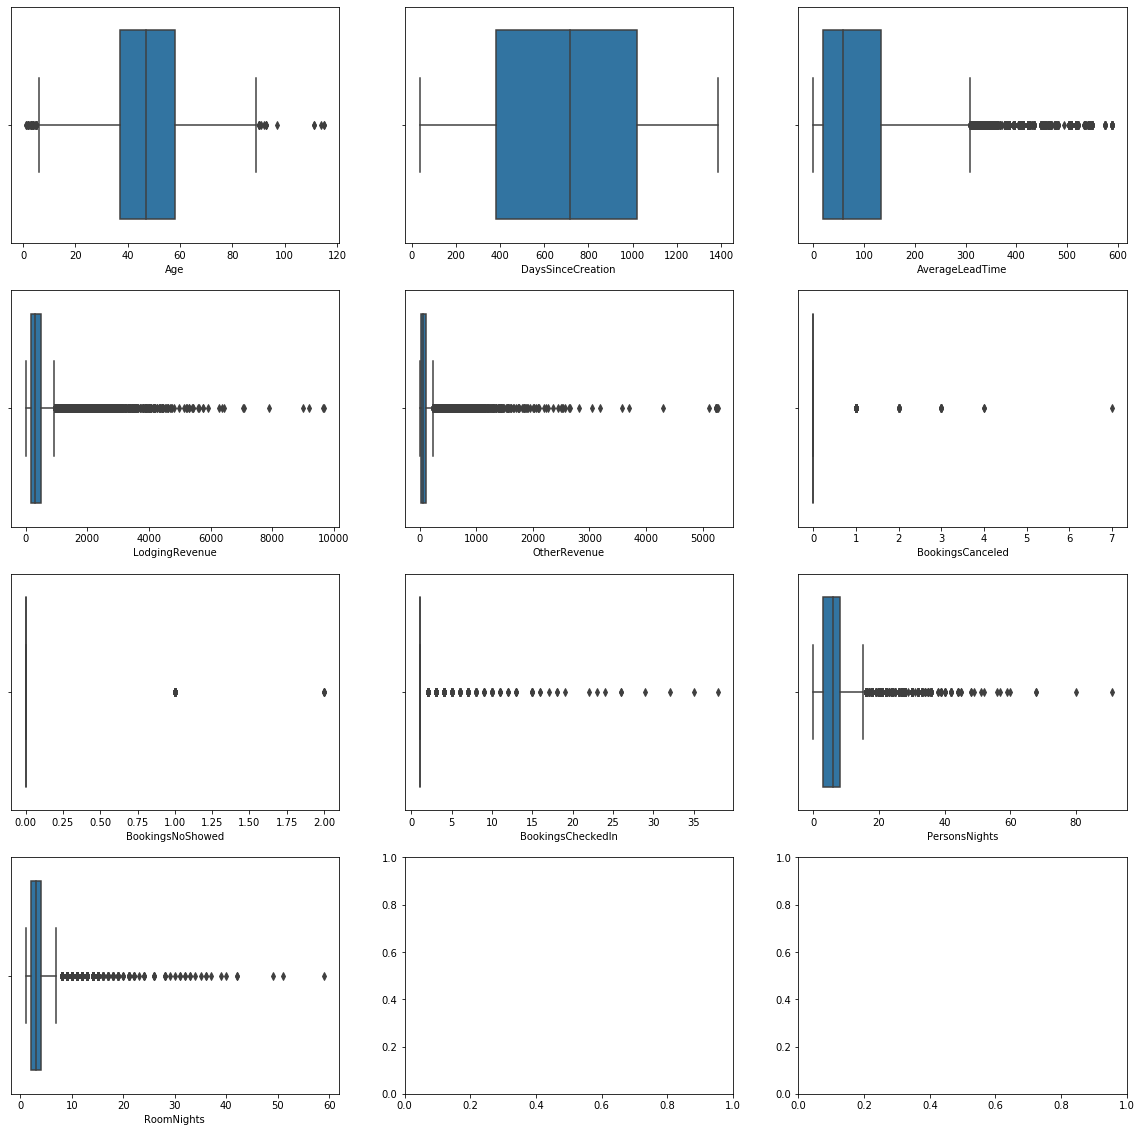

In [19]:
fig, ax = plt.subplots(4, 3, figsize=(20, 20))
for var, subplot in zip(df_after[columns], ax.flatten()):
    sns.boxplot(df_after[var], ax=subplot) 

In [20]:
f = str(len(df_after[(df_after.BookingsNoShowed > 0)]))
g = str(len(df_after[(df_after.BookingsCanceled > 0)]))
h = str(len(df_after[(df_after.Age > 100)]))
print('There are {} which BookingsNoShowed are superior to zero.'.format(f))
print('')
print('There are {} which BookingsCanceled are superior to zero.'.format(g))
print('')
print('There are {} which Age is more than 100.'.format(h))

There are 35 which BookingsNoShowed are superior to zero.

There are 122 which BookingsCanceled are superior to zero.

There are 5 which Age is more than 100.


In [21]:
indexpeople = df_after[(df_after.LodgingRevenue == 0) & (df_after.BookingsNoShowed == 0) & (df_after.BookingsCheckedIn == 0) & (df_after.BookingsCanceled == 0)].index
df_after.drop(indexpeople, inplace=True)
df_after

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,52.000000,440,59,292.00,82.3,1,0,2,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,45.583514,1385,61,280.00,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,4,FRA,61.000000,1385,93,240.00,60.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,6,JPN,55.000000,1385,58,230.00,24.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,8,FRA,33.000000,1385,38,535.00,94.0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111724,111725,ESP,60.000000,37,43,875.00,167.8,0,0,1,...,0,0,0,0,0,1,1,0,0,0
111726,111727,PRT,51.000000,37,7,173.55,18.0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
111727,111728,DEU,34.000000,36,41,98.00,14.0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
111729,111730,BRA,43.000000,36,170,755.25,20.0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


* Round the age*

In [22]:
df_after = df_after.round({'Age':0})
df_after

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,52.0,440,59,292.00,82.3,1,0,2,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,46.0,1385,61,280.00,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,4,FRA,61.0,1385,93,240.00,60.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,6,JPN,55.0,1385,58,230.00,24.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,8,FRA,33.0,1385,38,535.00,94.0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111724,111725,ESP,60.0,37,43,875.00,167.8,0,0,1,...,0,0,0,0,0,1,1,0,0,0
111726,111727,PRT,51.0,37,7,173.55,18.0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
111727,111728,DEU,34.0,36,41,98.00,14.0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
111729,111730,BRA,43.0,36,170,755.25,20.0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


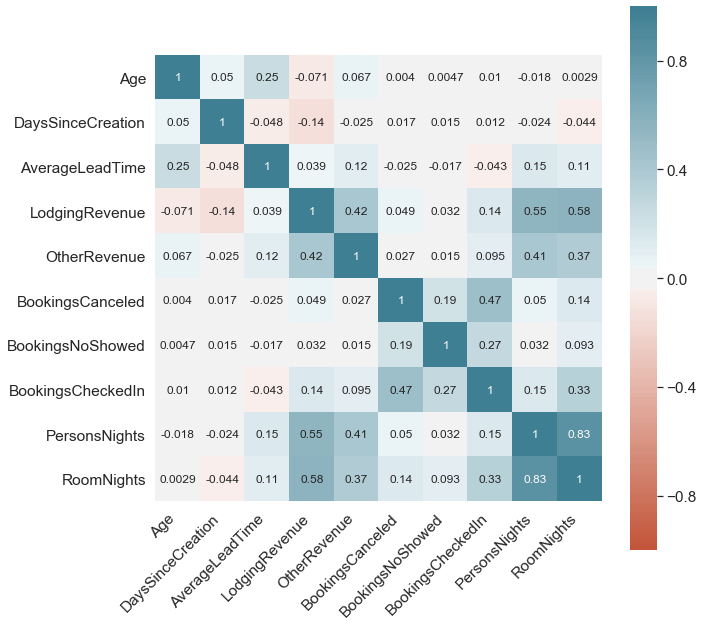

In [23]:
# Plot correlation heatmap of all numeric variables
corr = df_after[columns].corr()
plt.figure(figsize=(10, 10))
sns.set(font_scale=1.4)
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True, annot_kws={"size": 12}
)
bottom, top = ax.get_ylim() # These two lines were added due to bug on current Seaborn version
ax.set_ylim(bottom + 0.5, top - 0.5) #
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Variables with high correlation:
<ul>
    <li>Lodging Revenue and Room Nights - we will drop Room Nights</li>
    <li>Lodging Revenue and Persons Nights</li>
    <li>Persons Nights and Room Nights</li>
    <li>BookingsCheckedIn and Room Nights</li>
</ul>

In [24]:
df_after = df_after.drop(['PersonsNights'], axis=1)

<h4><u>Categorical Variables

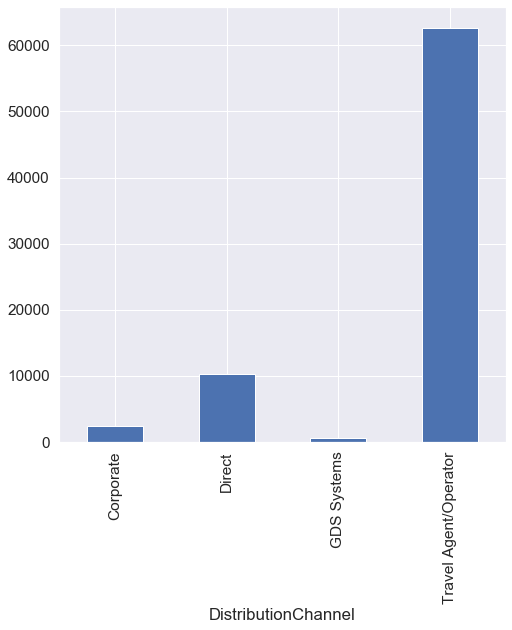

In [25]:
# Check counts of categorical variables
df_cat = df_after.loc[:,['ID','DistributionChannel','MarketSegment']]
channel =df_cat.groupby(['DistributionChannel'])['ID'].count()

channel.plot(kind="bar", 
                 figsize=(8,8))

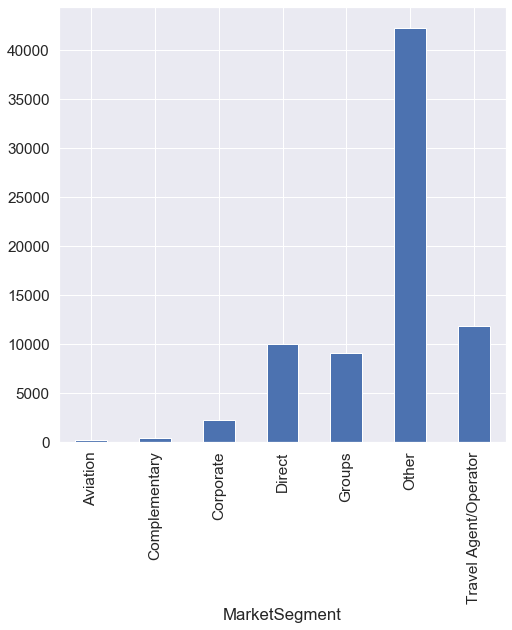

In [26]:
market =df_cat.groupby(['MarketSegment'])['ID'].count()

market.plot(kind="bar", 
                 figsize=(8,8))

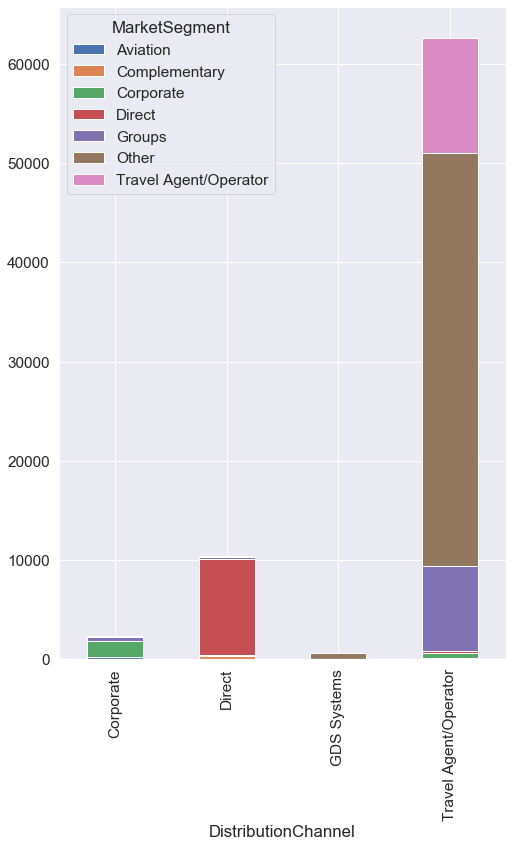

In [27]:
#channel_market =df_cat.groupby(['DistributionChannel'])['MarketSegment'].count()
channel_market =df_cat.pivot_table(values='ID', columns='MarketSegment', index='DistributionChannel', aggfunc='count')
channel_market = channel_market.fillna(0)
channel_market.plot(kind='bar',figsize=(8,12),stacked=True,legend=True)
#pd.pivot_table(g, values='X', rows='Y', cols='Z', margins=False, aggfunc='count')

We can observe that most of the costumers came from Travel Agents or Operatores channels, being the majority of them of the Travel Agent/Operator, Groups and Other Market Segments. 
**Note**: We have equal names in the Market Segments and Distribution Channel, such as Coporate, Travel Agent/Operator and Direct.

<u>Revenue per Distribution Channel

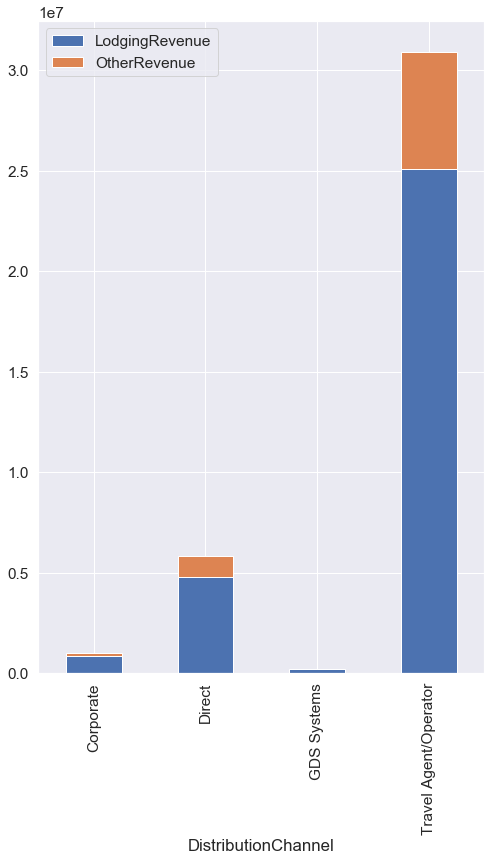

In [28]:
#Plot revenue per Distribution Channel
df_rev1 = df_after.pivot_table(values=['LodgingRevenue','OtherRevenue'], index='DistributionChannel', aggfunc='sum')
df_rev1.plot(kind='bar',figsize=(8,12),stacked=True,legend=True) 

<u>Revenue per Market Segment

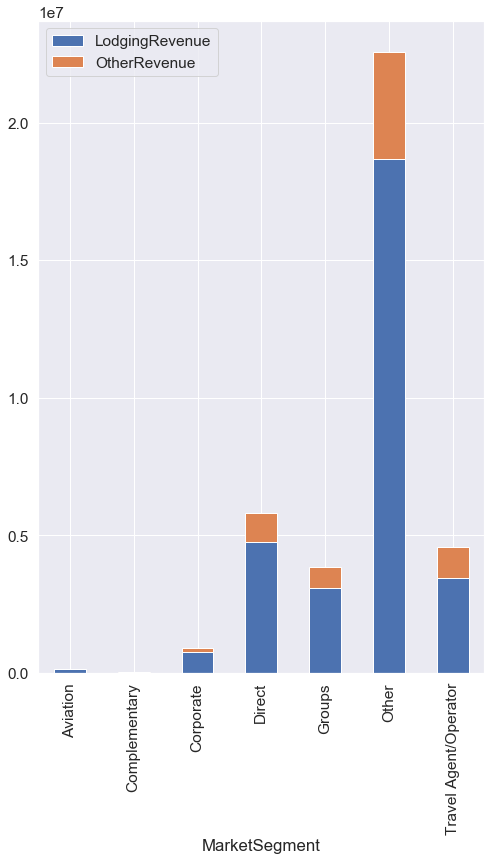

In [29]:
#Plot revenue per Market Segment
df_rev2 = df_after.pivot_table(values=['LodgingRevenue','OtherRevenue'], index='MarketSegment', aggfunc='sum')
df_rev2.plot(kind='bar',figsize=(8,12),stacked=True,legend=True) 

<u>Average Lead Time per Market Segment

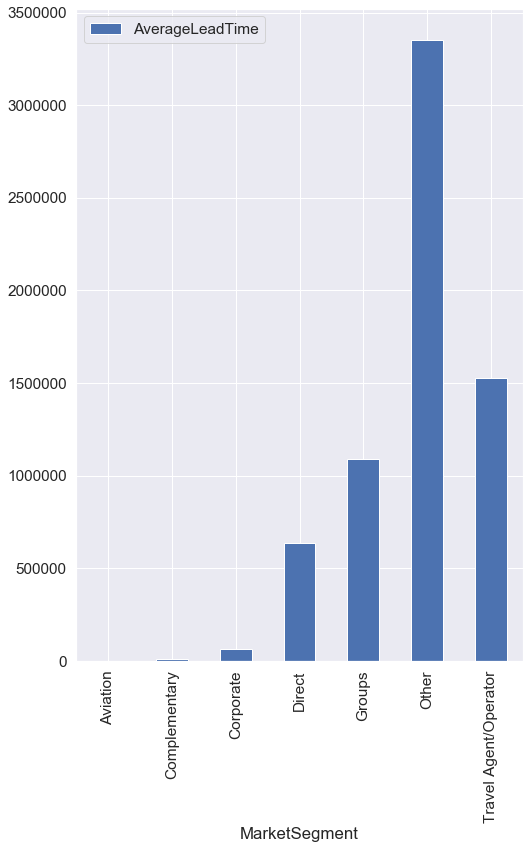

In [30]:
#Plot Average Lead Time per Market Segment
df_alt = df_after.pivot_table(values=['AverageLeadTime'], index='MarketSegment', aggfunc='sum')
df_alt.plot(kind='bar',figsize=(8,12),stacked=True,legend=True) 

<u>How many nationalities are?

In [31]:
#Check how many nationatilies we have in our dataset
n = len(df_after['Nationality'].drop_duplicates().to_list())
print('There are {} different nationalities.'.format(n))

There are 184 different nationalities.


<h4><u>Boolean Variables

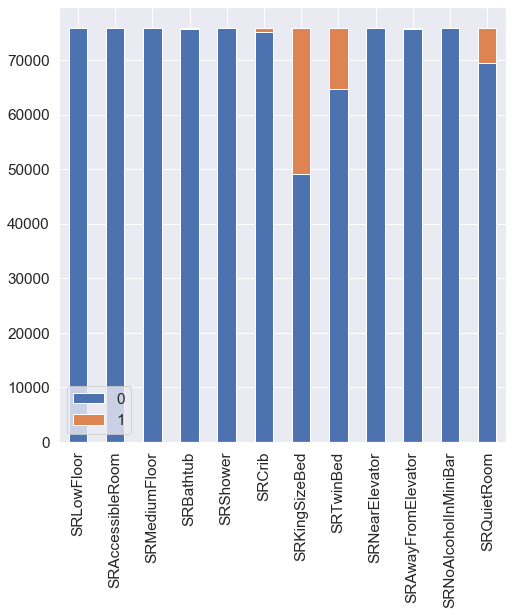

In [32]:
columns = df_after.columns.to_list()
boleans = df_after[columns[14:]]
#count per 0 and 1
boleans = boleans.apply(pd.Series.value_counts).transpose()

boleans.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

Do these variables all matter? Let's check. If we have two variables related to the Elevator and both show 0, this might mean that they did not answered or that it does not matter... so I believe we should not use either.

In [33]:
#Check the requirements per Market Segmentation
bl = ['MarketSegment', 'SRHighFloor', 'SRLowFloor',
       'SRAccessibleRoom', 'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar', 'SRQuietRoom']
yes = df_after[bl]
yes = yes.pivot_table(values=['SRHighFloor', 'SRLowFloor',
       'SRAccessibleRoom', 'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar', 'SRQuietRoom'], index='MarketSegment', aggfunc='sum')
yes

,SRAccessibleRoom,SRAwayFromElevator,SRBathtub,SRCrib,SRHighFloor,SRKingSizeBed,SRLowFloor,SRMediumFloor,SRNearElevator,SRNoAlcoholInMiniBar,SRQuietRoom,SRShower,SRTwinBed
MarketSegment,,,,,,,,,,,,,
Aviation,0,0,0,0,0,20,0,0,0,0,1,0,0
Complementary,0,0,1,12,8,137,0,1,0,0,2,0,44
Corporate,1,1,0,5,11,276,0,4,0,0,3,0,161
Direct,2,69,68,217,492,2067,18,12,6,1,416,48,838
Groups,3,6,1,23,19,1825,2,0,1,0,18,0,1736
Other,13,187,128,460,2478,21292,69,32,16,9,6013,75,6727
Travel Agent/Operator,1,14,23,84,142,1255,3,6,3,0,91,4,1792


In [34]:
i = str(len(df_after[(df_after.SRLowFloor == 1)]))
j = str(len(df_after[(df_after.SRAccessibleRoom == 1)]))
k = str(len(df_after[(df_after.SRMediumFloor == 1)]))
l = str(len(df_after[(df_after.SRBathtub == 1)]))
m = str(len(df_after[(df_after.SRShower == 1)]))
n = str(len(df_after[(df_after.SRCrib == 1)]))
o = str(len(df_after[(df_after.SRKingSizeBed == 1)]))
p = str(len(df_after[(df_after.SRTwinBed == 1)]))
q = str(len(df_after[(df_after.SRNearElevator == 1)]))
r = str(len(df_after[(df_after.SRAwayFromElevator == 1)]))
s = str(len(df_after[(df_after.SRNoAlcoholInMiniBar == 1)]))
t = str(len(df_after[(df_after.SRQuietRoom == 1)]))

print('There are {} people that answer yes to SRLowFloor.'.format(i))
print('')
print('There are {} people that answer yes to SRAccessibleRoom.'.format(j))
print('')
print('There are {} people that answer yes to SRMediumFloor.'.format(k))
print('')
print('There are {} people that answer yes to SRBathtub.'.format(l))
print('')
print('There are {} people that answer yes to SRShower.'.format(m))
print('')
print('There are {} people that answer yes to SRCrib.'.format(n))
print('')
print('There are {} people that answer yes to SRKingSizeBed.'.format(o))
print('')
print('There are {} people that answer yes to SRTwinBed.'.format(p))
print('')
print('There are {} people that answer yes to SRNearElevator.'.format(q))
print('')
print('There are {} people that answer yes to SRAwayFromElevator.'.format(r))
print('')
print('There are {} people that answer yes to SRNoAlcoholInMiniBar.'.format(s))
print('')
print('There are {} people that answer yes to SRQuietRoom.'.format(t))

There are 92 people that answer yes to SRLowFloor.

There are 20 people that answer yes to SRAccessibleRoom.

There are 55 people that answer yes to SRMediumFloor.

There are 221 people that answer yes to SRBathtub.

There are 127 people that answer yes to SRShower.

There are 801 people that answer yes to SRCrib.

There are 26872 people that answer yes to SRKingSizeBed.

There are 11298 people that answer yes to SRTwinBed.

There are 26 people that answer yes to SRNearElevator.

There are 277 people that answer yes to SRAwayFromElevator.

There are 10 people that answer yes to SRNoAlcoholInMiniBar.

There are 6544 people that answer yes to SRQuietRoom.


- With these results, I believe we should use the SRCrib, SRKingSizeBed, SRTwinBed and SRQuietRoom variables. 

In [35]:
df_after.columns

Index(['ID', 'Nationality', 'Age', 'DaysSinceCreation', 'AverageLeadTime',
       'LodgingRevenue', 'OtherRevenue', 'BookingsCanceled',
       'BookingsNoShowed', 'BookingsCheckedIn', 'RoomNights',
       'DistributionChannel', 'MarketSegment', 'SRHighFloor', 'SRLowFloor',
       'SRAccessibleRoom', 'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib',
       'SRKingSizeBed', 'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator',
       'SRNoAlcoholInMiniBar', 'SRQuietRoom'],
      dtype='object')

In [36]:
data = pd.DataFrame([df_after.Nationality, df_after.Age, df_after.AverageLeadTime, df_after.LodgingRevenue,
                     df_after.OtherRevenue, df_after.BookingsCanceled, df_after.BookingsNoShowed, 
                     df_after.BookingsCheckedIn, df_after.RoomNights, df_after.DistributionChannel, df_after.SRCrib,
                     df_after.SRKingSizeBed, df_after.SRTwinBed, df_after.SRQuietRoom]).transpose()

In [37]:
df_after.Nationality.unique()

array(['PRT', 'FRA', 'JPN', 'IRL', 'ESP', 'BEL', 'AUT', 'DEU', 'ITA',
       'CHN', 'RUS', 'POL', 'USA', 'CRI', 'CHE', 'ROU', 'GBR', 'BRA',
       'FIN', 'AGO', 'NLD', 'CAN', 'ZAF', 'GRC', 'AUS', 'ISR', 'BGR',
       'SAU', 'SWE', 'ARG', 'ARM', 'CHL', 'MAR', 'MOZ', 'KOR', 'TUN',
       'DNK', 'NOR', 'MYS', 'EGY', 'HRV', 'JOR', 'LUX', 'TUR', 'IRN',
       'LBY', 'PAN', 'COL', 'VEN', 'DZA', 'GNB', 'CZE', 'SVN', 'AZE',
       'IND', 'HUN', 'NZL', 'PER', 'LTU', 'TWN', 'SRB', 'EST', 'KAZ',
       'KWT', 'IDN', 'UKR', 'MEX', 'SVK', 'MLI', 'ARE', 'BGD', 'THA',
       'TZA', 'BIH', 'LVA', 'PHL', 'BHR', 'NAM', 'BOL', 'CYP', 'SGP',
       'CMR', 'MLT', 'URY', 'PAK', 'JAM', 'ECU', 'SYC', 'QAT', 'PRY',
       'BRB', 'OMN', 'TMP', 'ABW', 'LBN', 'AIA', 'SLV', 'DMA', 'CUB',
       'VNM', 'GEO', 'IRQ', 'GAB', 'UGA', 'LIE', 'SEN', 'BLR', 'ISL',
       'DOM', 'GUY', 'LCA', 'CPV', 'ATA', 'NGA', 'RWA', 'CIV', 'ALB',
       'MKD', 'MNE', 'GTM', 'GHA', 'MDV', 'MCO', 'MUS', 'SYR', 'TGO',
       'LKA', 'SUR',

In [38]:
mapping = {'PRT':'Europe', 'DEU':'Europe', 'FRA':'Europe', 'IRL':'Europe', 'ESP':'Europe', 'BEL':'Europe', 
         'NLD':'Europe', 'AUT':'Europe', 'ITA':'Europe', 'RUS':'Europe', 'POL':'Europe', 'HUN':'Europe', 'CHE':'Europe', 
         'ROU':'Europe', 'GBR':'Europe', 'BIH':'Europe', 'FIN':'Europe', 'GRC':'Europe','BGR':'Europe',
         'SWE':'Europe', 'DNK':'Europe', 'NOR':'Europe', 'HRV':'Europe', 'LUX':'Europe', 'CZE':'Europe', 'AND':'Europe',
         'SVN':'Europe', 'LTU':'Europe', 'SRB':'Europe', 'EST':'Europe', 'UKR':'Europe', 'SVK':'Europe', 'LVA':'Europe',
         'CYP':'Europe', 'MLT':'Europe', 'LIE':'Europe', 'BLR':'Europe', 'ISL':'Europe', 'ALB':'Europe', 'MKD':'Europe',
         'MNE':'Europe', 'MCO':'Europe', 'FRO':'Europe', 'JEY':'Europe', 'GIB':'Europe', 'SMR':'Europe', 'SJM':'Europe',
         'JPN':'Asia', 'CHN':'Asia', 'TWN':'Asia', 'ISR':'Asia', 'SAU':'Asia', 'ARM':'Asia', 'KOR':'Asia', 'MYS':'Asia',
         'IND':'Asia', 'JOR':'Asia', 'IRN':'Asia', 'AZE':'Asia', 'KAZ':'Asia', 'KWT':'Asia', 'IDN':'Asia', 'BGD':'Asia',
         'THA':'Asia', 'PHL':'Asia', 'BHR':'Asia', 'SGP':'Asia', 'PAK':'Asia', 'QAT':'Asia', 'OMN':'Asia', 'LBN':'Asia',
         'VNM':'Asia', 'IRQ':'Asia','MDV':'Asia',  'SYR':'Asia', 'LKA':'Asia', 'HKG':'Asia', 'UZB':'Asia', 'TJK':'Asia',
         'LAO':'Asia', 'TUR':'Asia', 'GEO':'Asia', 'KGZ':'Asia', 'TKM':'Asia', 'MMR':'Asia', 'IOT':'Asia', 'NPL':'Asia',
         'AFG':'Asia', 'USA':'America', 'CRI':'America', 'MEX':'America', 'BRA':'America', 'CAN':'America', 'ARG':'America',
         'CHL':'America', 'PAN':'America', 'COL':'America', 'VEN':'America', 'PER':'America', 'BOL':'America', 
         'URY':'America', 'JAM':'America', 'ECU':'America', 'PRY':'America', 'BRB':'America', 'ABW':'America',
         'AIA':'America', 'SLV':'America', 'DMA':'America', 'CUB':'America', 'DOM':'America', 'GUY':'America',
         'LCA':'America', 'GTM':'America', 'SUR':'America', 'PRI':'America', 'SPM':'America', 'NIC':'America', 
         'ATG':'America', 'FLK':'America', 'BHS':'America', 'UMI':'America', 'HTI':'America', 'VIR':'America',
         'VCT':'America', 'GUF':'America', 'GRD':'America', 'TTO':'America', 'HND':'America', 'BMU':'America', 
         'KNA':'America', 'CYM':'America', 'AGO':'Africa', 'ZAF':'Africa', 'MAR':'Africa', 'MOZ':'Africa', 'TUN':'Africa',
         'EGY':'Africa', 'CPV':'Africa', 'COD':'Africa', 'DZA':'Africa', 'LBY':'Africa', 'GNB':'Africa', 'UGA':'Africa',
         'MLI':'Africa', 'TZA':'Africa', 'NAM':'Africa', 'CMR':'Africa', 'SYC':'Africa', 'TMP':'Africa', 'GAB':'Africa',
         'SEN':'Africa', 'NGA':'Africa', 'RWA':'Africa', 'CIV':'Africa', 'GHA':'Africa', 'MUS':'Africa', 'TGO':'Africa',
         'KEN':'Africa', 'MRT':'Africa', 'CAF':'Africa', 'STP':'Africa', 'SDN':'Africa', 'SLE':'Africa', 'COM':'Africa',
         'ETH':'Africa', 'BEN':'Africa', 'ZWE':'Africa', 'BWA':'Africa', 'ERI':'Africa', 'GNQ':'Africa', 'MDG':'Africa',
         'GIN':'Africa', 'SWZ':'Africa', 'SOM':'Africa', 'MWI':'Africa', 'TCD':'Africa', 'YEM':'Africa', 'NER':'Africa',
         'BFA':'Africa', 'BDI':'Africa', 'AUS':'Oceania', 'NZL':'Oceania', 'ARE':'Oceania', 'NCL':'Oceania', 
         'KIR':'Oceania', 'WLF':'Oceania', 'PNG':'Oceania', 'WSM':'Oceania', 'NRU':'Oceania', 'PCN':'Oceania', 
         'FJI':'Oceania', 'TON':'Oceania', 'FSM':'Oceania', 'ATA':'Antartica', 'ATF':'Antartica', 'ASM':'Antartica'}

data['Continent'] = data.Nationality.map(mapping)

In [39]:
data.isnull().sum()

Nationality            0
Age                    0
AverageLeadTime        0
LodgingRevenue         0
OtherRevenue           0
BookingsCanceled       0
BookingsNoShowed       0
BookingsCheckedIn      0
RoomNights             0
DistributionChannel    0
SRCrib                 0
SRKingSizeBed          0
SRTwinBed              0
SRQuietRoom            0
Continent              0
dtype: int64

In [40]:
data = data.drop('Nationality', axis = 1)

In [41]:
data['Lodging/Bok'] = df_after['LodgingRevenue']/df_after['BookingsCheckedIn']
data['OtherRev/Bok'] = df_after['OtherRevenue']/df_after['BookingsCheckedIn']
data['Bookings/Days'] = df_after['BookingsCheckedIn']/df_after['DaysSinceCreation']

In [42]:
data = data.drop(['LodgingRevenue','OtherRevenue'], axis = 1)

In [43]:
data.describe()

,Lodging/Bok,OtherRev/Bok,Bookings/Days
count,75945.000000,75945.000000,75945.000000
mean,395.950647,90.581903,0.002839
std,357.476296,129.107444,0.003804
min,0.000000,0.000000,0.000722
25%,186.000000,28.000000,0.000988
50%,307.840000,57.600000,0.001416
75%,479.700000,113.800000,0.002695
max,9682.400000,5268.500000,0.087282


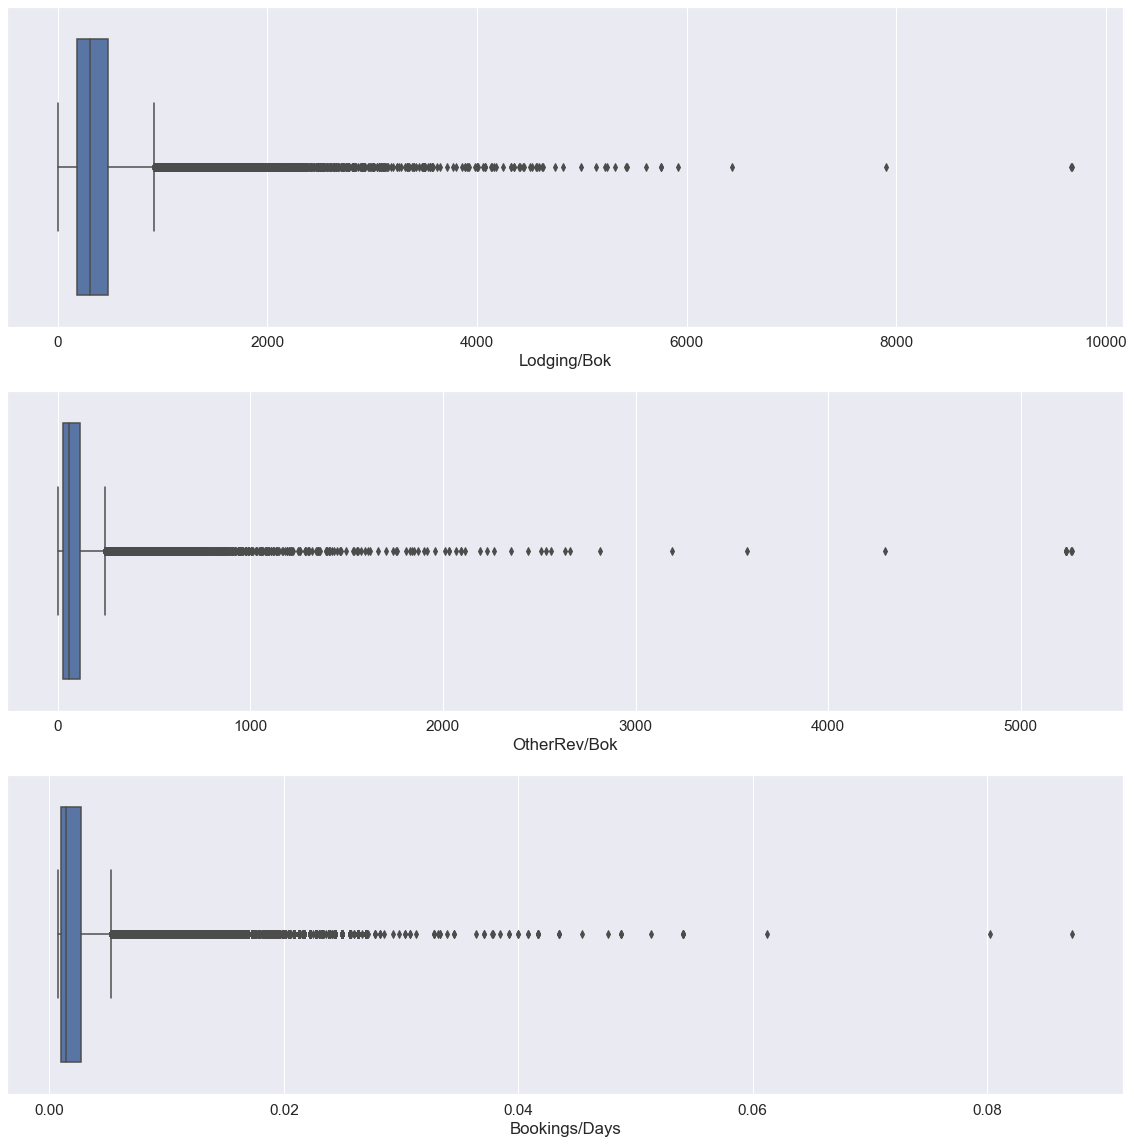

In [44]:
columns1 = ['Lodging/Bok', 'OtherRev/Bok', 'Bookings/Days']
fig, ax = plt.subplots(3, 1, figsize=(20, 20))
for var, subplot in zip(data[columns1], ax.flatten()):
    sns.boxplot(data[var], ax=subplot) 


<h3>Data Preparation

**Bin of continuous variables**

In [45]:
#Age Bins
data['age_bins'] = pd.cut(x=data['Age'], bins=[0, 18, 24, 44, 64, 123], labels=['0 - 18 years', '19 - 24 years', '25 - 44 years', '45 - 64 years', '65 or + years'])
data = data.drop(['Age'], axis=1)

In [46]:
#Bin AverageLeadTime
data['AverageLeadTime_bin'] = pd.cut(x=data['AverageLeadTime'], bins=[-1, 30, 183, 365,900], labels=['< 1 month', '1 month - 6 months', '6 months - 1 year', '> 1 year'])
data = data.drop(['AverageLeadTime'], axis=1)

In [47]:
#Bin RoomNights
data['RoomNights_bin'] = pd.cut(x=data['RoomNights'], bins=[0, 30, 183, 365, 588], labels=['< 1 month', '1 month - 6 months', '6 months - 1 year', '> 1 year'])
data = data.drop(['RoomNights'], axis=1)

In [48]:
#Bin BookingsCanceled
data['BookCanceled_bin'] = pd.cut(x=data['BookingsCanceled'], bins=[-1, 1, 20], labels=['Not Canceled','Canceled'])
data = data.drop(['BookingsCanceled'], axis=1)

In [49]:
#Bin BookingsNoShowed
data['BookNoShowed_bin'] = pd.cut(x=data['BookingsNoShowed'], bins=[-1, 1, 20], labels=['No Showed', 'Showed'])
data = data.drop(['BookingsNoShowed'], axis=1)

In [50]:
#Bin BookingsCheckedIn
data['BookCheckedIn_bin'] = pd.cut(x=data['BookingsCheckedIn'], bins=[-1, 1, 4, 81], labels=['Normal', 'Medium', 'Frequent'])
data = data.drop(['BookingsCheckedIn'], axis=1)

In [51]:
#Bin Lodging/Bok
data['Lodging/Bok_bin'] = pd.cut(x=data['Lodging/Bok'], bins=[-1, 500, 4000, 9700], labels=['Low', 'Medium', 'High'])
data = data.drop(['Lodging/Bok'], axis=1)

In [52]:
#Bin OtherRev/Bok
data['OtherRev/Bok_bin'] = pd.cut(x=data['OtherRev/Bok'], bins=[-1, 60, 1250, 5300], labels=['Low', 'Medium', 'High'])
data = data.drop(['OtherRev/Bok'], axis=1)

In [53]:
#Bin Bookings/Days
data['Bookings/Days_bin'] = pd.cut(x=data['Bookings/Days'], bins=[-1, 0.01, 0.05, 0.09], labels=['Ocassionaly', 'Frequent', 'VeryFrequent'])
data = data.drop(['Bookings/Days'], axis=1)

In [54]:
data.isnull().sum()

DistributionChannel    0
SRCrib                 0
SRKingSizeBed          0
SRTwinBed              0
SRQuietRoom            0
Continent              0
age_bins               0
AverageLeadTime_bin    0
RoomNights_bin         0
BookCanceled_bin       0
BookNoShowed_bin       0
BookCheckedIn_bin      0
Lodging/Bok_bin        0
OtherRev/Bok_bin       0
Bookings/Days_bin      0
dtype: int64

Encode Categorical variables to dummy variables

In [55]:
# Encode categorical variables to dummy variables
cols = ['DistributionChannel', 'Continent', 'age_bins', 'AverageLeadTime_bin', 'RoomNights_bin', 'BookCanceled_bin', 'BookNoShowed_bin', 'BookCheckedIn_bin', 'Lodging/Bok_bin', 'OtherRev/Bok_bin', 'Bookings/Days_bin']
ce_one_hot = ce.OneHotEncoder(cols = cols, use_cat_names=True)
data = ce_one_hot.fit_transform(data)

In [56]:
data

,DistributionChannel_Corporate,DistributionChannel_Travel Agent/Operator,DistributionChannel_Direct,DistributionChannel_GDS Systems,SRCrib,SRKingSizeBed,SRTwinBed,SRQuietRoom,Continent_Europe,Continent_Asia,...,BookCheckedIn_bin_Frequent,Lodging/Bok_bin_Low,Lodging/Bok_bin_Medium,Lodging/Bok_bin_High,OtherRev/Bok_bin_Low,OtherRev/Bok_bin_Medium,OtherRev/Bok_bin_High,Bookings/Days_bin_Ocassionaly,Bookings/Days_bin_Frequent,Bookings/Days_bin_VeryFrequent
0,1,0,0,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
1,0,1,0,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
3,0,1,0,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
5,0,1,0,0,0,0,0,0,0,1,...,0,1,0,0,1,0,0,1,0,0
7,0,1,0,0,0,1,0,0,1,0,...,0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111724,0,1,0,0,0,0,1,0,1,0,...,0,0,1,0,0,1,0,0,1,0
111726,0,0,1,0,0,0,0,1,1,0,...,0,1,0,0,1,0,0,0,1,0
111727,0,1,0,0,0,1,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0
111729,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0


In [57]:
#Change all to int64
data['SRCrib'] = data.SRCrib.astype('int64')
data['SRKingSizeBed'] = data.SRKingSizeBed.astype('int64')
data['SRTwinBed'] = data.SRTwinBed.astype('int64')
data['SRQuietRoom'] = data.SRQuietRoom.astype('int64')

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75945 entries, 0 to 111731
Data columns (total 43 columns):
DistributionChannel_Corporate                75945 non-null int64
DistributionChannel_Travel Agent/Operator    75945 non-null int64
DistributionChannel_Direct                   75945 non-null int64
DistributionChannel_GDS Systems              75945 non-null int64
SRCrib                                       75945 non-null int64
SRKingSizeBed                                75945 non-null int64
SRTwinBed                                    75945 non-null int64
SRQuietRoom                                  75945 non-null int64
Continent_Europe                             75945 non-null int64
Continent_Asia                               75945 non-null int64
Continent_America                            75945 non-null int64
Continent_Africa                             75945 non-null int64
Continent_Oceania                            75945 non-null int64
Continent_Antartica             

In [59]:
# Get a copy of the dataframe before normalization
data_beforeNorm = data.copy(deep=True)

# Normalize all columns
cols = list(data.columns) # save the name of the columns
data_array = data.values # returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
data_scaled = min_max_scaler.fit_transform(data_array)
data = pd.DataFrame(data_scaled, columns=cols)

In [60]:
data

,DistributionChannel_Corporate,DistributionChannel_Travel Agent/Operator,DistributionChannel_Direct,DistributionChannel_GDS Systems,SRCrib,SRKingSizeBed,SRTwinBed,SRQuietRoom,Continent_Europe,Continent_Asia,...,BookCheckedIn_bin_Frequent,Lodging/Bok_bin_Low,Lodging/Bok_bin_Medium,Lodging/Bok_bin_High,OtherRev/Bok_bin_Low,OtherRev/Bok_bin_Medium,OtherRev/Bok_bin_High,Bookings/Days_bin_Ocassionaly,Bookings/Days_bin_Frequent,Bookings/Days_bin_VeryFrequent
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75940,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
75941,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
75942,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
75943,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


(75945, 2)


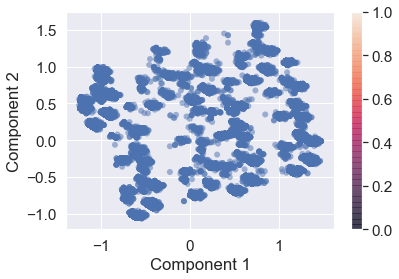

In [61]:
# Let'start to visualise with only two components so we can see this in two dimensions
pca2 = PCA(n_components = 2)
pca2.fit(data)
data_pca2 = pca2.transform(data) # Apply the dimension reduction to the dataset
print(data_pca2.shape)

# Plot a scatter plot of the two Principal Components by the "target" to see if there is any pattern
plt.scatter(data_pca2[:, 0], data_pca2[:, 1], edgecolor='none', alpha=0.5, cmap='viridis')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar();

In [62]:
# Fit the PCA algorithm to data 
pca = PCA().fit(data)

# Show the variance per component
pcaevr = ['{:f}'.format(item) for item in pca.explained_variance_ratio_]
pcaDF = pd.DataFrame({'Component': range(1, len(data.columns)+1),
                      'Variance explained': pcaevr,
                      'Cumulative variance explained': np.cumsum(pca.explained_variance_ratio_)})
pcaDF

,Component,Variance explained,Cumulative variance explained
0,1,0.192767,0.192767
1,2,0.122279,0.315047
2,3,0.120697,0.435744
3,4,0.090314,0.526058
4,5,0.083091,0.609150
5,6,0.066928,0.676077
6,7,0.065079,0.741156
7,8,0.052632,0.793788
8,9,0.042350,0.836138
9,10,0.031114,0.867253


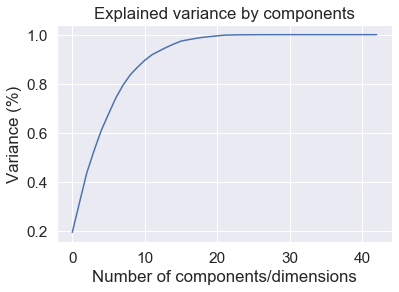

In [63]:
# Plot the cumulative explained variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components/dimensions')
plt.ylabel('Variance (%)')
plt.title('Explained variance by components')
plt.show()

With 15 components is possible to explain 98.6% of the variance.

In [64]:
# Apply the dimension reduction to the dataset (for 15 components)
pca_reduced = PCA(n_components = 15)
pca_reduced.fit(data)
data_pca_reduced = pca_reduced.transform(data) 
print(data_pca_reduced.shape)

(75945, 15)


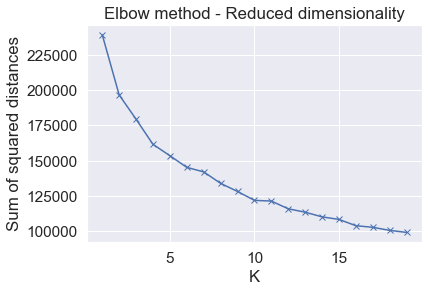

In [65]:
# Select K based on the sum of squared distances
ssd = []
K = range(1,20)
for k in K:
    km = KMeans(n_clusters=k, random_state=123)
    km = km.fit(data_pca_reduced)
    ssd.append(km.inertia_)
    
# Plot results
plt.plot(K, ssd, 'bx-')
plt.xlabel('K')
plt.ylabel('Sum of squared distances')
plt.title('Elbow method - Reduced dimensionality')
plt.show()

In [76]:
def silhouette_plot(dataframe):
    X = dataframe
    range_n_clusters = [3, 4, 5, 6]

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1) = plt.subplots(1, 1)
        fig.set_size_inches(12, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    
        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=0, n_init = 5, max_iter = 200)
        cluster_labels = clusterer.fit_predict(X)
    
        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)
    
        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]
    
            ith_cluster_silhouette_values.sort()
    
            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i
    
            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)
    
            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    
            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples
    
        ax1.set_title("The silhouette plot for {} clusters.".format(str(n_clusters)))
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")
    
        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    
        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.show()

For n_clusters = 3 The average silhouette_score is : 0.15233699661692815
For n_clusters = 4 The average silhouette_score is : 0.18115419715471906
For n_clusters = 5 The average silhouette_score is : 0.17569802290921666
For n_clusters = 6 The average silhouette_score is : 0.18483276210198882


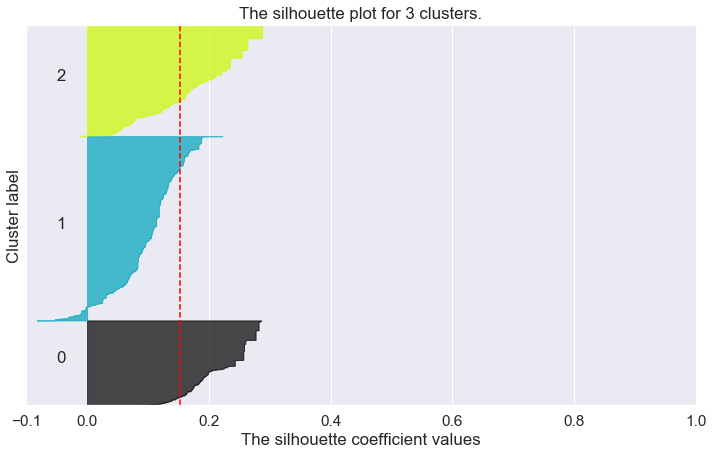

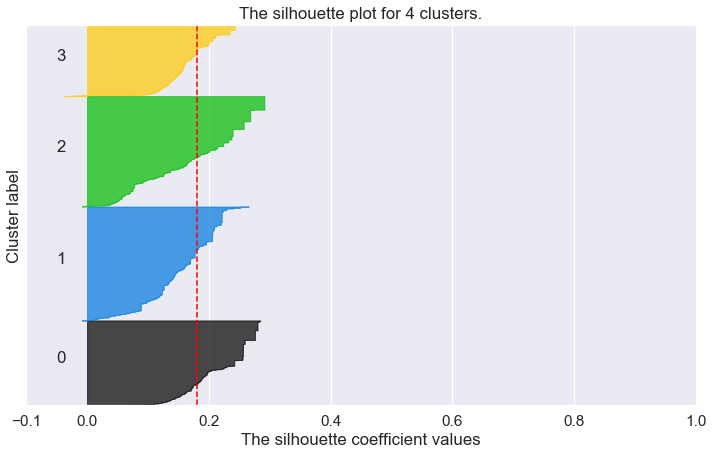

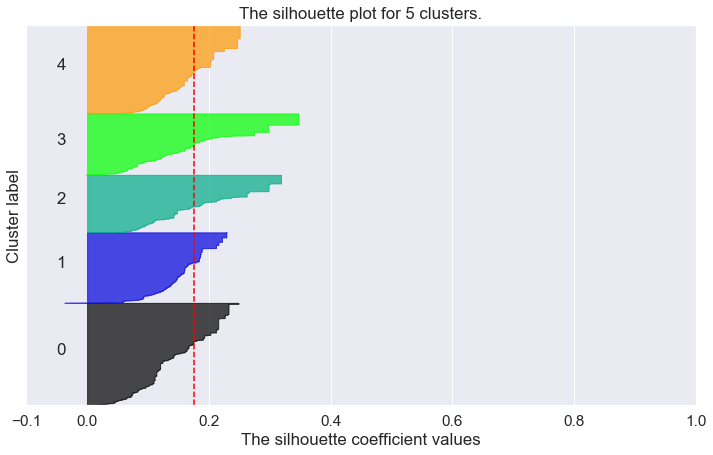

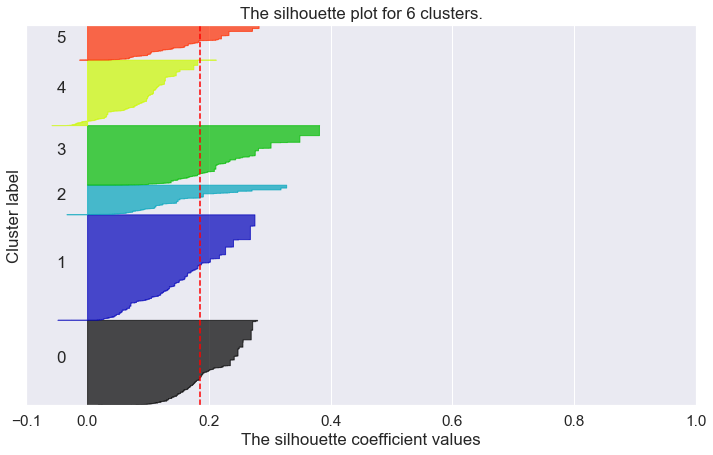

In [77]:
silhouette_plot(data_pca_reduced)

K=5 seems to be the choice using this method

In [66]:
# Apply the K-Means for K=5
K=5
kmeans = KMeans(n_clusters=K, random_state=123)
kmeans.fit(data_pca_reduced)
y_kmeans = kmeans.predict(data_pca_reduced)

In [67]:
# Count observations per cluster
data_beforeNorm.groupby(y_kmeans).size()

0     8822
1    14082
2    12134
3    18605
4    22302
dtype: int64

In [68]:
# Apply the K-Means for K=4
K=4
kmeans = KMeans(n_clusters=K, random_state=123)
kmeans.fit(data_pca_reduced)
y_kmeans = kmeans.predict(data_pca_reduced)

In [69]:
# Count observations per cluster
data_beforeNorm.groupby(y_kmeans).size()

0    17018
1    21935
2    14255
3    22737
dtype: int64

In [ ]:
# Plot results two principal components
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Component 1', fontsize = 15)
ax.set_ylabel('Component 2', fontsize = 15)
ax.set_title('Two principal components', fontsize = 20)
ax.scatter(data_pca_reduced[:, 0], data_pca_reduced[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [ ]:
# Create a dataframe with the weights per component
wheightsDF = pd.DataFrame(pca.components_,columns=data.columns)
wheightsDF

In [ ]:
# Study the weights of component 15
comp = abs(wheightsDF.iloc[14])  ## id 14 is component 14
comp = comp.sort_values(ascending=False)
comp

In [ ]:
# Check the mean values of each cluster for top 30 relevant featureslen()
top_features = comp[:30].index
clustersMeanDF = pd.DataFrame(data_beforeNorm[top_features].groupby(y_kmeans).mean(),columns=top_features)
clustersMeanDF.transpose()